In this project I will do some EDA on the dataset and predict tips based on the best predictors I will find.

In [2]:
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
import seaborn as sns

c:\Users\Kamil\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Kamil\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Let's import the dataset and view information about this dataset to validate it.

In [6]:
data = pd.read_csv('tips.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Here is a code for a similar summary as is seen in RStudio (my main coding language).

In [7]:
def summary(df):
    numeric_stats = df.describe(include=[np.number])
    categorical_stats = df.describe(include=['object'])
    info = df.info()
    value_counts = {col: df[col].value_counts() for col in df.select_dtypes(include=['object']).columns}

    return numeric_stats, categorical_stats, value_counts

# Usage
numeric_summary, categorical_summary, value_counts = summary(data)
print("Numeric Summary:\n", numeric_summary)
print("\nCategorical Summary:\n", categorical_summary)
print("\nValue Counts for Categorical Columns:\n", value_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
Numeric Summary:
        total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Categorical Summary:
          sex smoker  day    time
count    244

Few plot to show the relationship between the data.

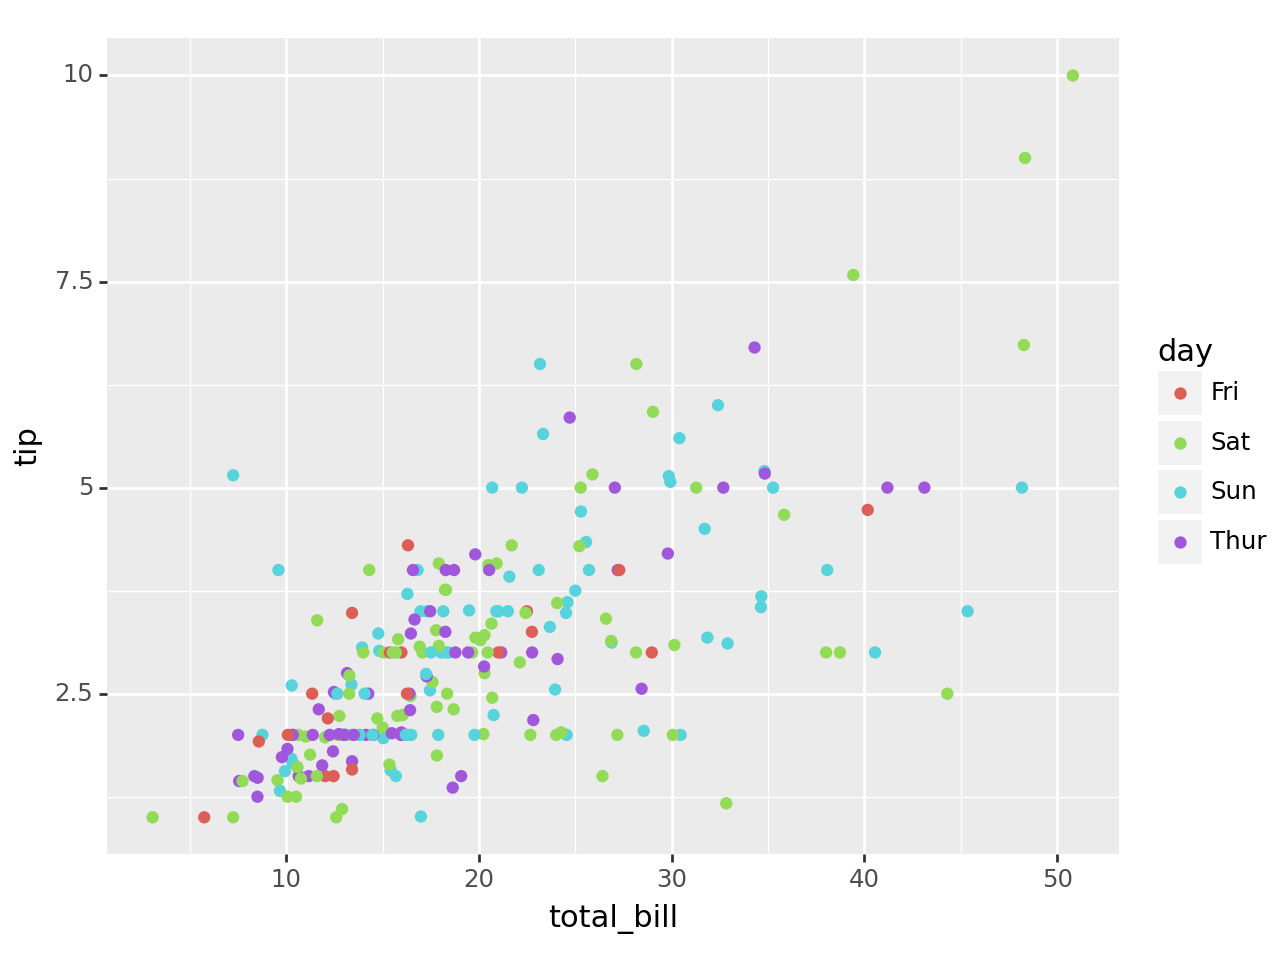

<Figure Size: (640 x 480)>

In [8]:
plot = ggplot(data, aes(x='total_bill', y='tip')) + geom_point(aes(color = 'day'))
plot

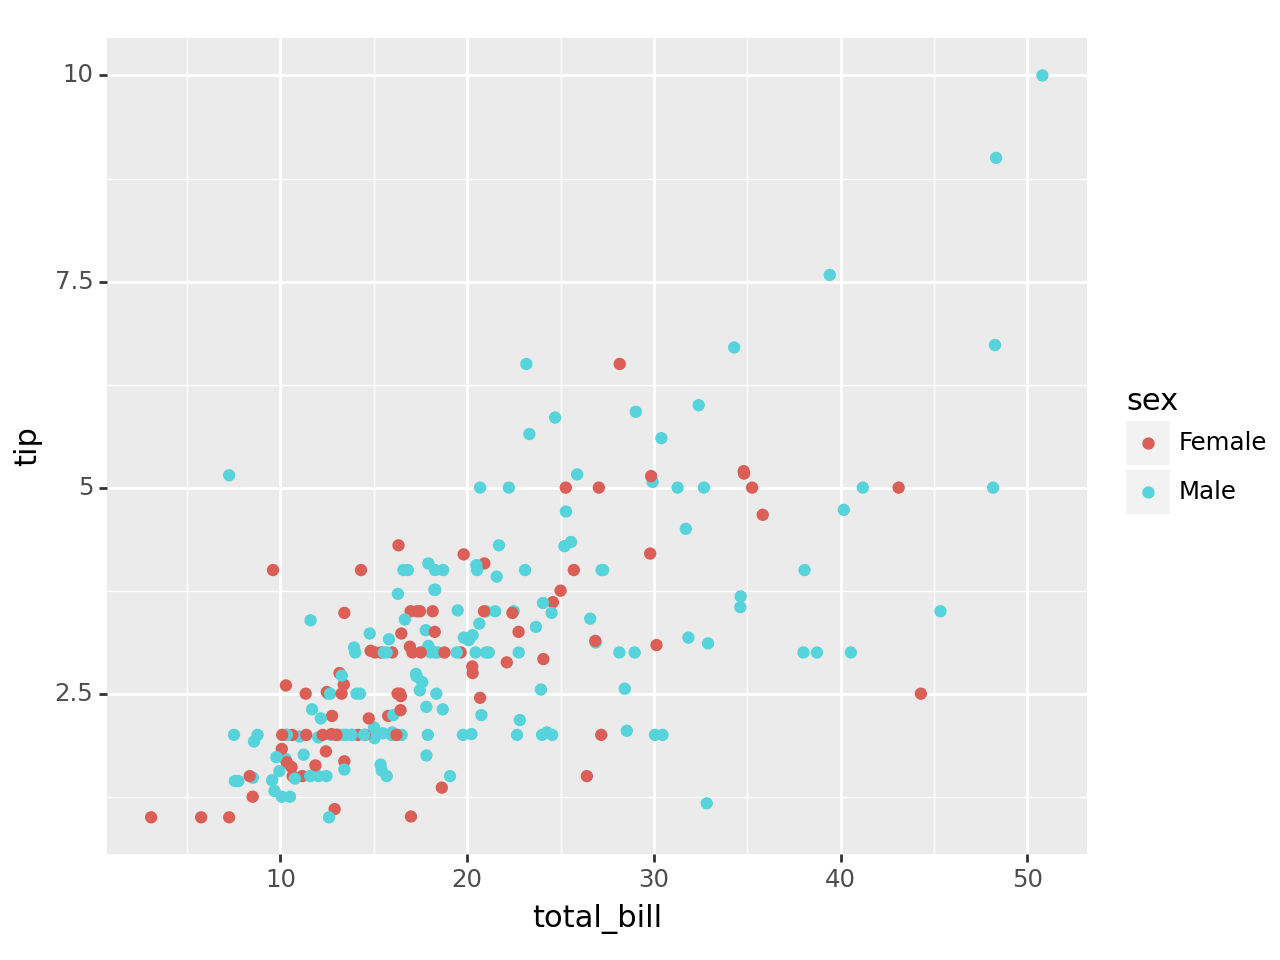

In [9]:
plot2 = ggplot(data, aes(x = 'total_bill', y = 'tip')) + geom_point(aes(color = 'sex'))
print(plot2)

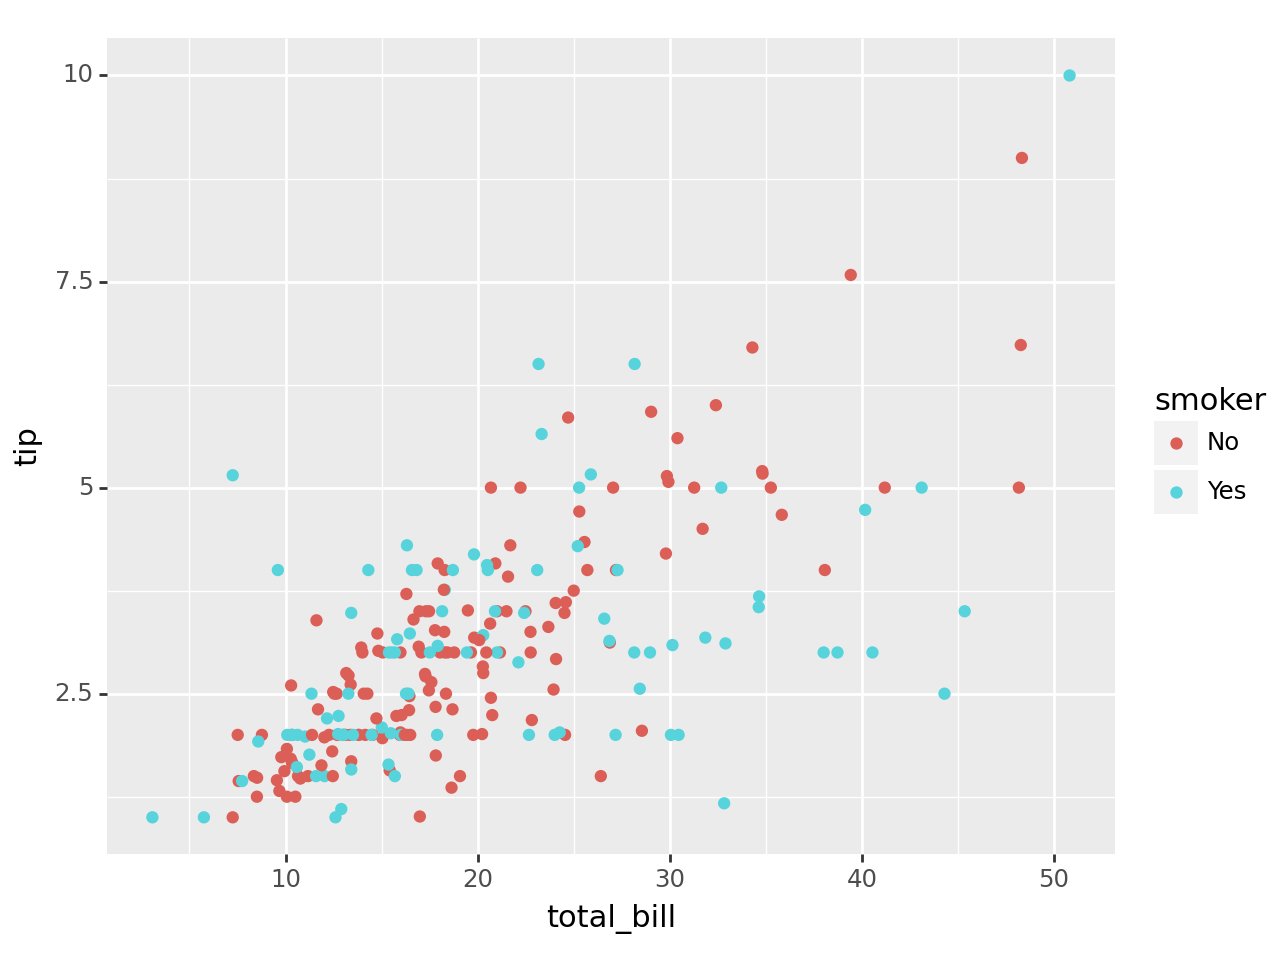

In [10]:
plot3 = ggplot(data, aes(x = 'total_bill', y = 'tip')) + geom_point(aes(color = 'smoker'))
print(plot3)

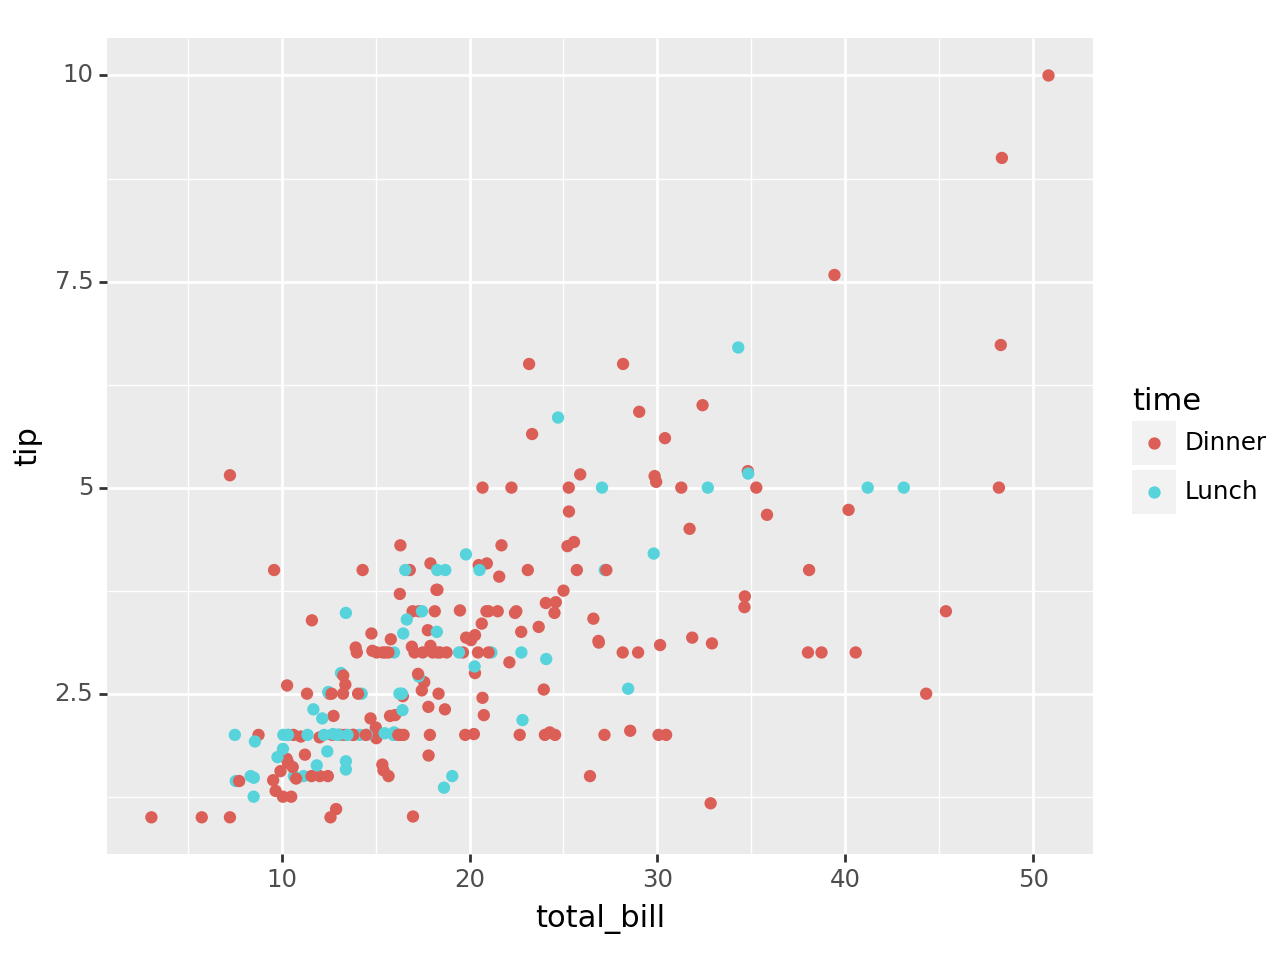

In [11]:
plot4 = ggplot(data, aes(x = 'total_bill', y = 'tip')) + geom_point(aes(color = 'time'))
print(plot4)

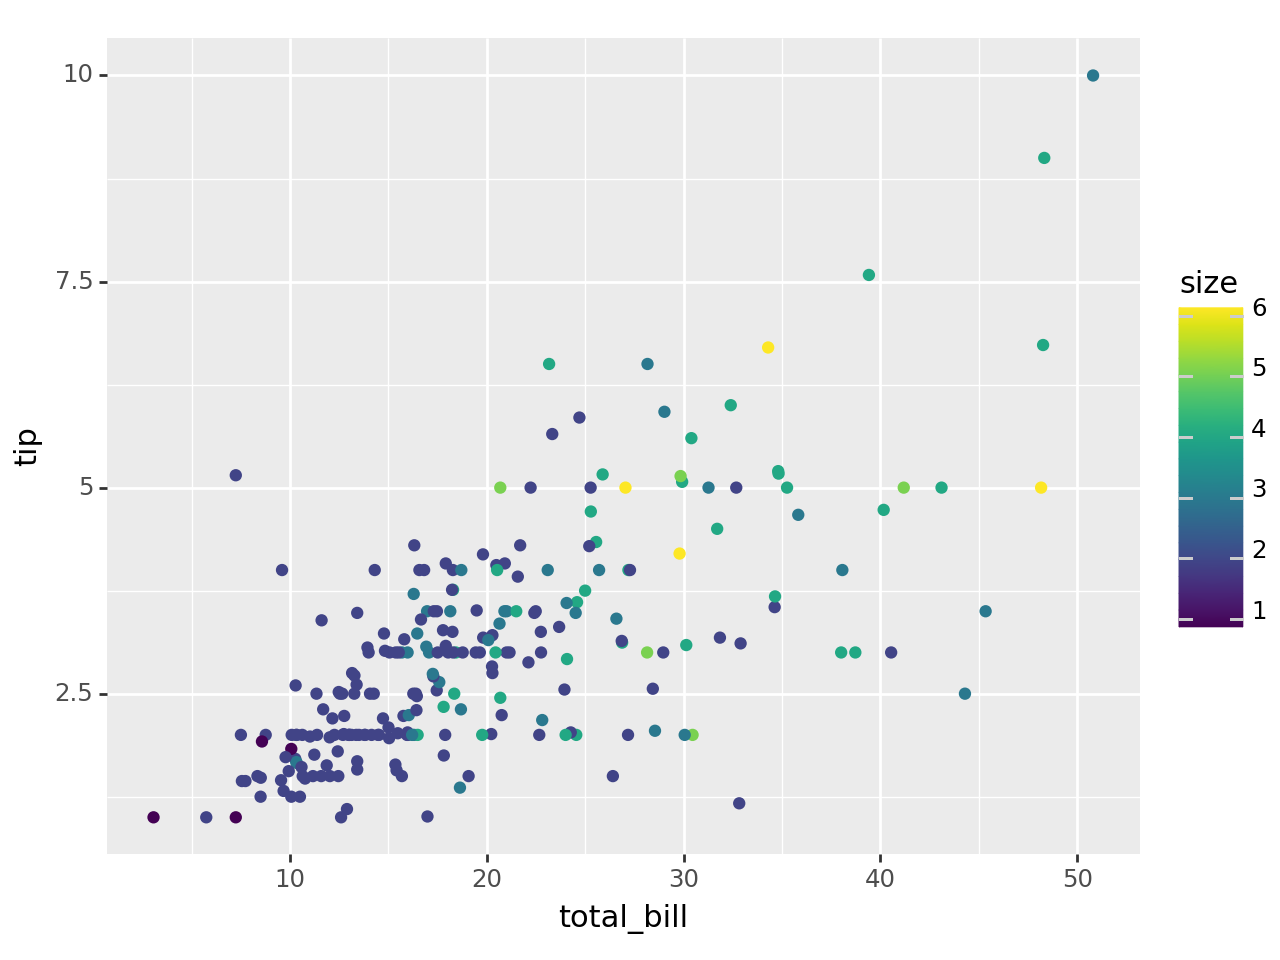

In [12]:
plot5 = ggplot(data, aes(x = 'total_bill', y = 'tip')) + geom_point(aes(color = 'size'))
print(plot5)

In [13]:
print(data['sex'].unique())
print(data['smoker'].unique())
print(data['day'].unique())
print(data['time'].unique())

['Female' 'Male']
['No' 'Yes']
['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']


Here, I will change the type of data for columns 'sex', 'smoker', 'day' and 'time' to categorical values, so that we can include them in analysis and building the linear regression model.

In [14]:
data['sex'] = data['sex'].map({'Female': 0, 'Male': 1})
data['smoker'] = data['smoker'].map({'No': 0, 'Yes': 1})
data['day'] = data['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
data['time'] = data['time'].map({'Dinner': 0, 'Lunch': 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,0,2
1,10.34,1.66,1,0,3,0,3
2,21.01,3.50,1,0,3,0,3
3,23.68,3.31,1,0,3,0,2
4,24.59,3.61,0,0,3,0,4


Splitting the data.

In [15]:
data_train, data_test = train_test_split(data, test_size=0.25, train_size=0.75, random_state=None, shuffle=True, stratify=None)
data_train.head()

,total_bill,tip,sex,smoker,day,time,size
212,48.33,9.00,1,0,2,0,4
31,18.35,2.50,1,0,2,0,4
14,14.83,3.02,0,0,3,0,2
136,10.33,2.00,0,0,0,1,2
1,10.34,1.66,1,0,3,0,3


Correlation matrix to show the best explanatory variables (with high correlation values with respect with tip).

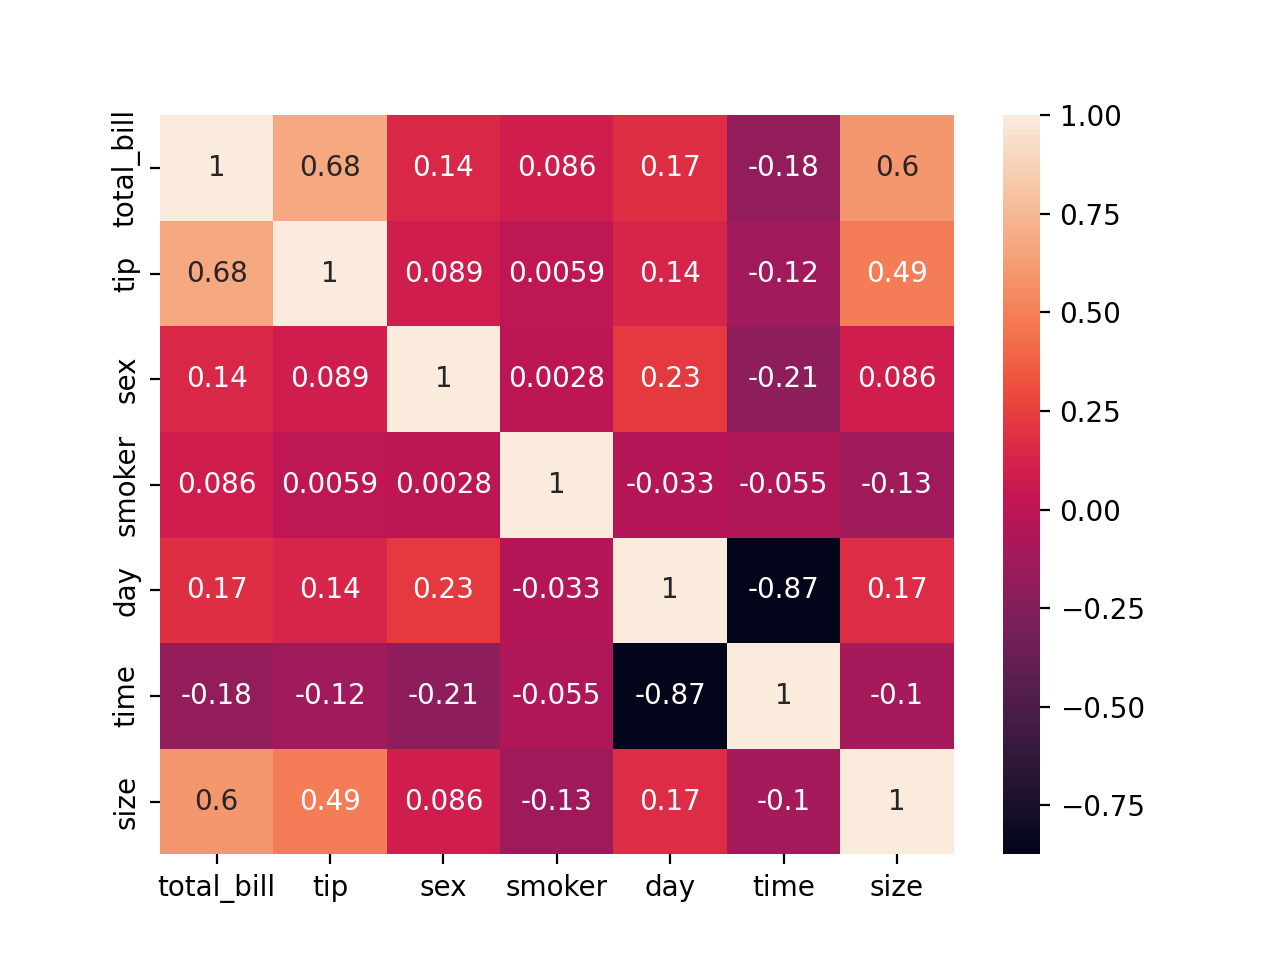

In [22]:
corr_matrix = data.corr()

sn.heatmap(corr_matrix, annot=True)
plt.show()

And now I will build a model with 'total_bill' and 'size' as explanatory variables.

In [18]:
X = data_train[['total_bill', 'size']]
y = data_train['tip']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     90.11
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           7.66e-28
Time:                        12:55:02   Log-Likelihood:                -261.50
No. Observations:                 183   AIC:                             529.0
Df Residuals:                     180   BIC:                             538.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5446      0.229      2.377      0.0

This model explains 49.5% of the data variability. The model indicates that the total bill has a significant positive effect on tip amount, with a one-unit increase in the bill corresponding to a 0.1006 unit increase in the tip. However, the size of the party does not show a statistically significant impact on tips. Overall, while the model explains some variation in tipping behavior, there may be other unaccounted factors at play.

## Checking the assumptions of linear regression.

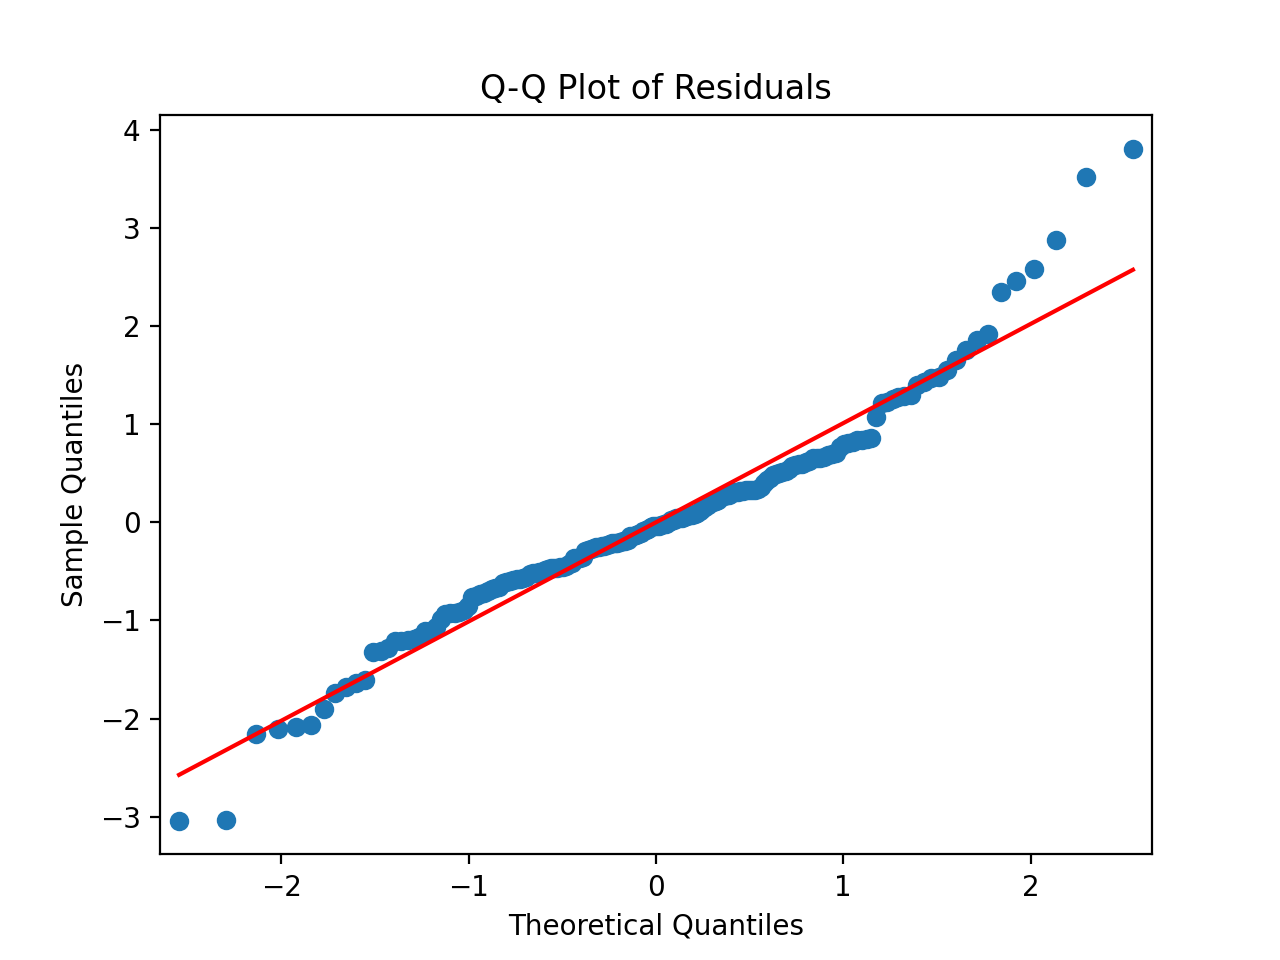

In [26]:
predictions = model.predict(X)
residuals = y - predictions

fig = sm.qqplot(residuals, line='s') 
plt.title("Q-Q Plot of Residuals")
plt.show()

In [20]:
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test[0]}, p-value={shapiro_test[1]}")

Shapiro-Wilk Test: Statistic=0.9633920192718506, p-value=0.0001028818660415709


In [21]:
0.0001028818660415709 < 0.05

True

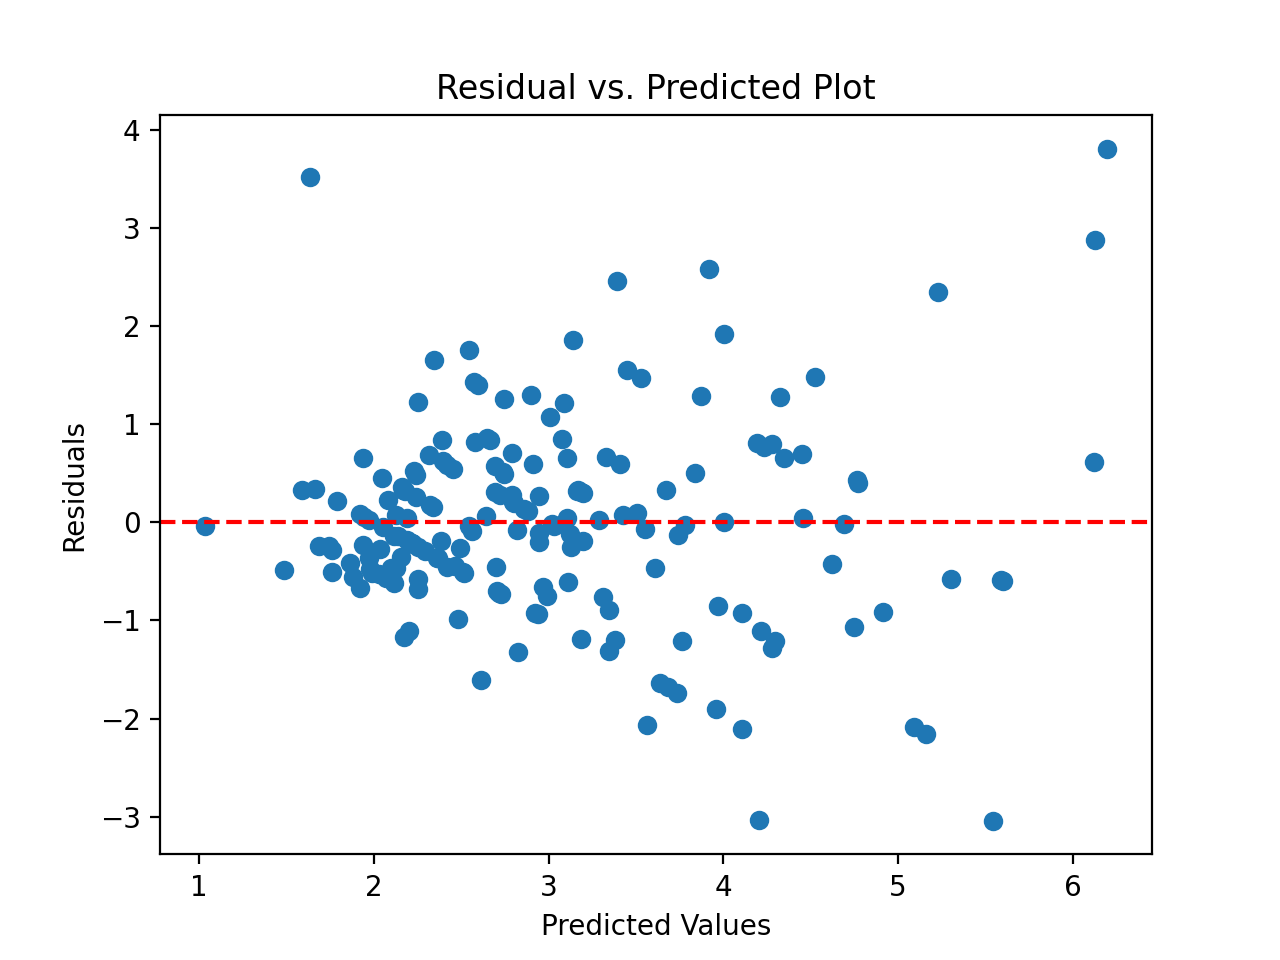

In [25]:
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual vs. Predicted Plot')
plt.show()

In [31]:
bp_test = het_breuschpagan(residuals, model.model.exog)
print(f'Breusch-Pagan test statistic: ', bp_test[0])
print(f'Breusch-Pagan test p-value: ', bp_test[1])

Breusch-Pagan test statistic:  43.18288438866622
Breusch-Pagan test p-value:  4.19716264217226e-10


In [32]:
average_residuals = residuals.mean()
print('Mean of residuals: ', average_residuals)

Mean of residuals:  9.828203824550566e-16


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

      feature       VIF
0       const  9.264911
1  total_bill  1.582268
2        size  1.582268


The assumptions have been verified and I accept this model.

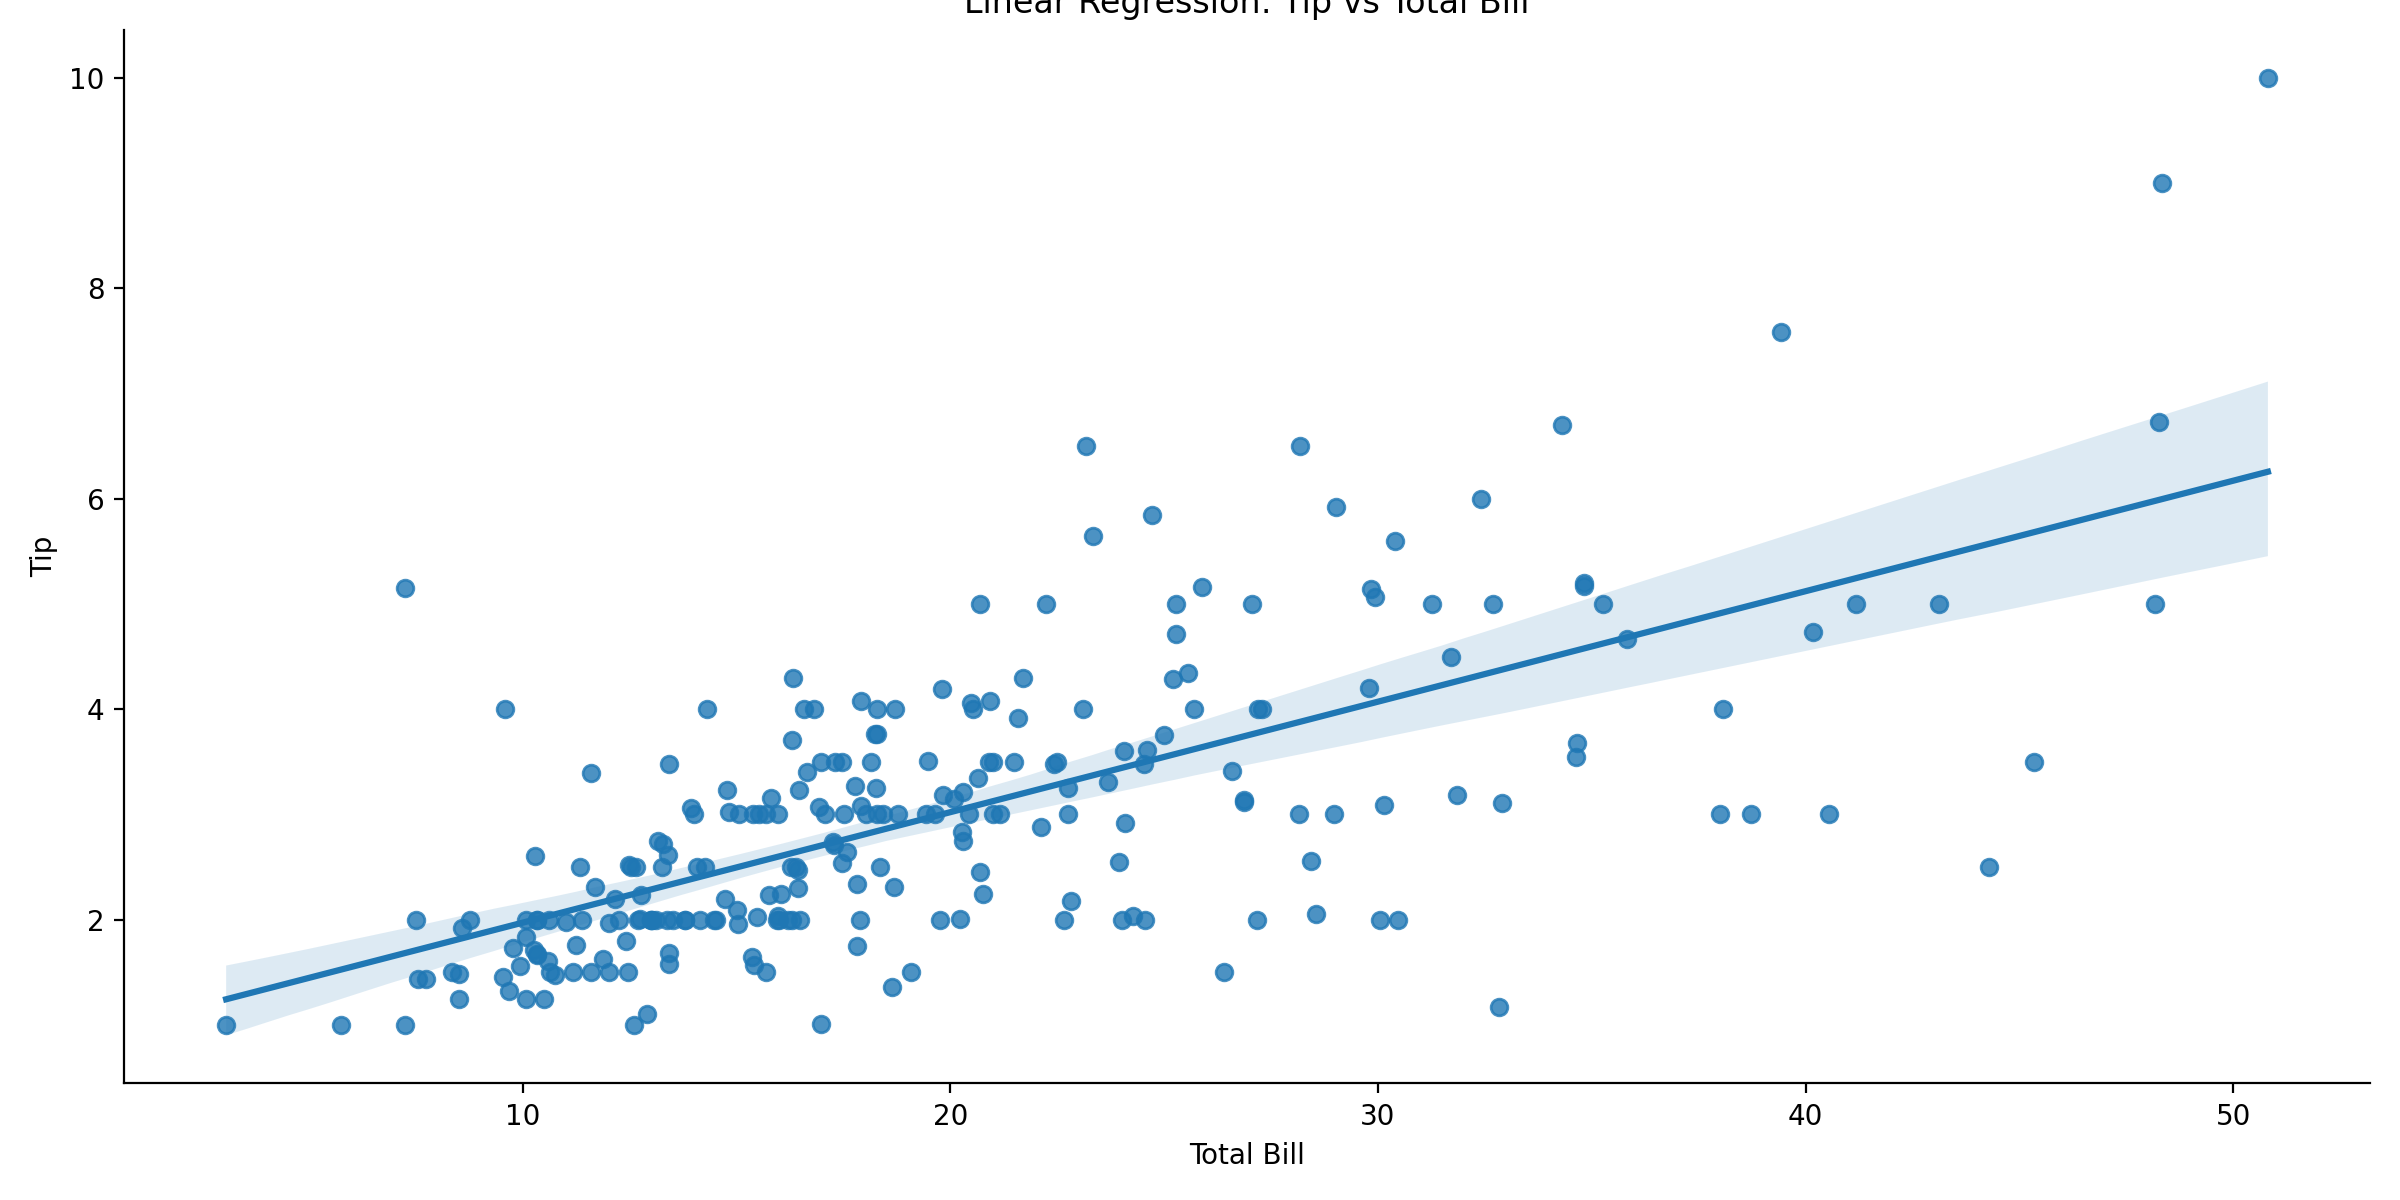

In [38]:
sns.lmplot(x='total_bill', y='tip', data=data, aspect=2, height=6)
plt.title('Linear Regression: Tip vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()